# Creating a Mutual Fund Plan with Python
Mutual funds are investment plans that pool money from multiple investors to purchase a diversified portfolio of stocks, bonds, and other securities, managed by professional fund managers. A mutual fund plan is created by selecting the stocks where an investor can benefit in the long term.
A mutual fund plan is created by selecting the stocks where an investor can benefit in the long term. Here’s the process we can follow to create a mutual fund plan:

Step 1: Gather historical stock data, such as closing prices and growth trends over time.

Step 2: Calculate key metrics like Return on Investment (ROI) and volatility (risk) to understand how each stock has performed historically.

Step 3: Choose stocks that have a high ROI and low volatility to ensure a balance between risk and reward.

Step 4: Calculate the future value of monthly investments based on the expected ROI of the selected stocks.

Let’s get started with the task of creating a mutual fund plan by importing the necessary Python libraries and the Dataset

In [1]:
import pandas as pd

data = pd.read_csv("nifty50_closing_prices.csv")
print(data.head())

                        Date  RELIANCE.NS  HDFCBANK.NS  ICICIBANK.NS  \
0  2024-08-20 00:00:00+05:30  2991.899902  1637.699951   1179.449951   
1  2024-08-21 00:00:00+05:30  2997.350098  1625.800049   1174.849976   
2  2024-08-22 00:00:00+05:30  2996.250000  1631.300049   1191.099976   
3  2024-08-23 00:00:00+05:30  2999.949951  1625.050049   1203.500000   
4  2024-08-26 00:00:00+05:30  3025.199951  1639.949951   1213.300049   

       INFY.NS       TCS.NS  KOTAKBANK.NS  HINDUNILVR.NS      ITC.NS  \
0  1872.199951  4523.299805   1805.650024    2751.050049  498.799988   
1  1872.699951  4551.500000   1812.949951    2791.199951  505.399994   
2  1880.250000  4502.000000   1821.500000    2792.800049  504.549988   
3  1862.099976  4463.899902   1818.000000    2815.600098  505.799988   
4  1876.150024  4502.450195   1812.500000    2821.149902  505.700012   

         LT.NS  ...  HEROMOTOCO.NS   DRREDDY.NS   SHREECEM.NS  BRITANNIA.NS  \
0  3572.699951  ...    5244.399902  6965.350098  24730.

Before moving forward, I’ll convert the date column into a datetime data type:

In [2]:
data['Date'] = pd.to_datetime(data['Date'])

Now, let’s have a look at whether this data has any null values or not

In [3]:
print(data.isnull().sum())

Date              0
RELIANCE.NS       0
HDFCBANK.NS       0
ICICIBANK.NS      0
INFY.NS           0
TCS.NS            0
KOTAKBANK.NS      0
HINDUNILVR.NS     0
ITC.NS            0
LT.NS             0
SBIN.NS           0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
HCLTECH.NS        0
ASIANPAINT.NS     0
AXISBANK.NS       0
DMART.NS          0
MARUTI.NS         0
ULTRACEMCO.NS     0
HDFC.NS          24
TITAN.NS          0
SUNPHARMA.NS      0
M&M.NS            0
NESTLEIND.NS      0
WIPRO.NS          0
ADANIGREEN.NS     0
TATASTEEL.NS      0
JSWSTEEL.NS       0
POWERGRID.NS      0
ONGC.NS           0
NTPC.NS           0
COALINDIA.NS      0
BPCL.NS           0
IOC.NS            0
TECHM.NS          0
INDUSINDBK.NS     0
DIVISLAB.NS       0
GRASIM.NS         0
CIPLA.NS          0
BAJAJFINSV.NS     0
TATAMOTORS.NS     0
HEROMOTOCO.NS     0
DRREDDY.NS        0
SHREECEM.NS       0
BRITANNIA.NS      0
UPL.NS            0
EICHERMOT.NS      0
SBILIFE.NS        0
ADANIPORTS.NS     0
BAJAJ-AUTO.NS     0


There are 24 null values in the closing prices of HDFC. Let’s fill in these null values using the forward fill method:

In [4]:
data.ffill(inplace=True)

Now, let’s have a look at the stock price trends of all the companies in the data

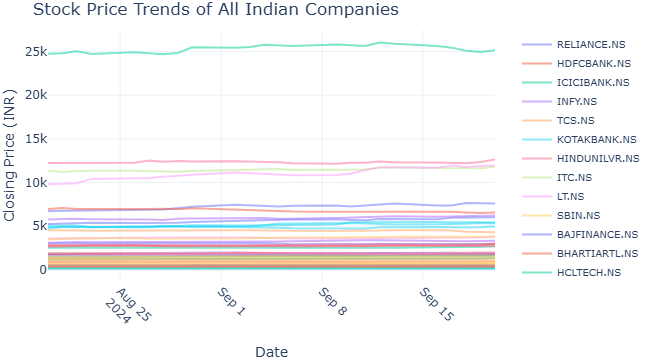

In [20]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

dates = np.array(data['Date'])

fig = go.Figure()

for company in data.columns[1:]:
    fig.add_trace(go.Scatter(x=dates, y=data[company],
                             mode='lines',
                             name=company,
                             opacity=0.5))

fig.update_layout(
    title='Stock Price Trends of All Indian Companies',
    xaxis_title='Date',
    yaxis_title='Closing Price (INR)',
    xaxis=dict(tickangle=45), 
    legend=dict(
        x=1.05,
        y=1,
        traceorder="normal",
        font=dict(size=10),
        orientation="v"
    ),
    margin=dict(l=0, r=0, t=30, b=0),  
    hovermode='x',
    template='plotly_white'
)

fig.show()

Let’s look at the companies with the highest risks for investing

In [6]:
all_companies = data.columns[1:]

volatility_all_companies = data[all_companies].std()

volatility_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64

Now, let’s look at the companies with the highest growth rate for investing


In [22]:
growth_all_companies = data[all_companies].pct_change(fill_method=None) * 100
average_growth_all_companies = growth_all_companies.mean()
average_growth_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    0.883421
BAJAJFINSV.NS    0.791730
BHARTIARTL.NS    0.735219
DIVISLAB.NS      0.634851
HEROMOTOCO.NS    0.602192
ICICIBANK.NS     0.557742
BAJFINANCE.NS    0.536819
TITAN.NS         0.393800
HINDUNILVR.NS    0.351634
BRITANNIA.NS     0.327747
dtype: float64

Now, let’s have a look at the companies with the highest return on investments:

In [8]:
initial_prices_all = data[all_companies].iloc[0]
final_prices_all = data[all_companies].iloc[-1]

roi_all_companies = ((final_prices_all - initial_prices_all) / initial_prices_all) * 100

roi_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    22.107017
BAJAJFINSV.NS    19.642973
BHARTIARTL.NS    18.120965
DIVISLAB.NS      15.404976
HEROMOTOCO.NS    14.660402
ICICIBANK.NS     13.480860
BAJFINANCE.NS    12.797149
TITAN.NS          9.275089
HINDUNILVR.NS     8.235039
BRITANNIA.NS      7.713587
dtype: float64

## Creating a Mutual Fund Plan Based on High ROI and Low Risk

To create a strategy for selecting companies with high ROI and low risk, we can use a combination of ROI and volatility (standard deviation) metrics. The goal is to find companies that offer a high return on investment (ROI) but with low volatility to minimize risk.

Here are the steps we can follow for creating a mutual fund plan:

1) Define ROI and Volatility Thresholds: We will set thresholds for ROI and volatility to select companies that provide good returns with lower risks.
2) Rank Companies by ROI and Volatility: Rank all companies based on their ROI and volatility scores.
3) Assign Investment Ratios: Allocate more investment to companies with higher ROI and lower volatility.

Let’s start by defining thresholds and selecting companies that meet the criteria of high ROI and low volatility:

In [15]:
roi_threshold = roi_all_companies.median()
volatility_threshold = volatility_all_companies.median()

selected_companies = roi_all_companies[(roi_all_companies > roi_threshold) & (volatility_all_companies < volatility_threshold)]

print('The following companies meet the criteria of high ROI and low volatility:')
selected_companies.sort_values(ascending=False)

The following companies meet the criteria of high ROI and low volatility:


ICICIBANK.NS     13.480860
INDUSINDBK.NS     7.159914
JSWSTEEL.NS       7.021748
AXISBANK.NS       6.592466
HDFCBANK.NS       6.319839
SUNPHARMA.NS      5.627425
KOTAKBANK.NS      5.474481
CIPLA.NS          4.850117
NTPC.NS           4.356926
dtype: float64

To balance the investment between these companies, we can use an inverse volatility ratio for allocation. Companies with lower volatility will get a higher weight. Let’s calculate the weight for each company:

In [16]:
selected_volatility = volatility_all_companies[selected_companies.index]
inverse_volatility = 1 / selected_volatility

investment_ratios = inverse_volatility / inverse_volatility.sum()

print('The investment ratios based on inverse volatility are as follows:')
investment_ratios.sort_values(ascending=False)

The investment ratios based on inverse volatility are as follows:


NTPC.NS          0.280768
JSWSTEEL.NS      0.159985
AXISBANK.NS      0.092231
HDFCBANK.NS      0.089330
CIPLA.NS         0.084783
KOTAKBANK.NS     0.076642
INDUSINDBK.NS    0.074432
SUNPHARMA.NS     0.072553
ICICIBANK.NS     0.069276
dtype: float64

### Analyzing Mutual Fund Plan

Created a mutual fund plan for long-term investments. Now, let’s analyze and compare our mutual fund plan by comparing it with the high-performing companies in the stock market. Let’s start by comparing the risks in our mutual fund with the risk in the high growth companies:

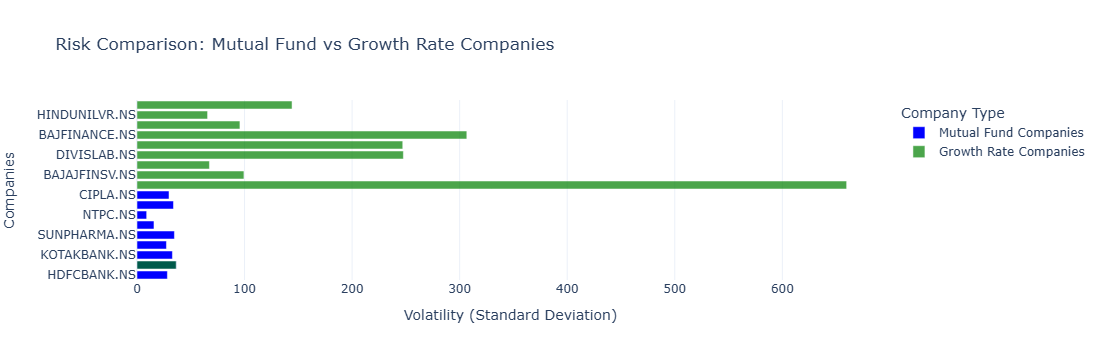

In [11]:
top_growth_companies = average_growth_all_companies.sort_values(ascending=False).head(10)
risk_growth_rate_companies = volatility_all_companies[top_growth_companies.index]
risk_mutual_fund_companies = volatility_all_companies[selected_companies.index]

fig = go.Figure()

fig.add_trace(go.Bar(
    y=risk_mutual_fund_companies.index,
    x=risk_mutual_fund_companies,
    orientation='h',  # Horizontal bar
    name='Mutual Fund Companies',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=risk_growth_rate_companies.index,
    x=risk_growth_rate_companies,
    orientation='h',  
    name='Growth Rate Companies',
    marker=dict(color='green'),
    opacity=0.7
))

fig.update_layout(
    title='Risk Comparison: Mutual Fund vs Growth Rate Companies',
    xaxis_title='Volatility (Standard Deviation)',
    yaxis_title='Companies',
    barmode='overlay',  
    legend=dict(title='Company Type'),
    template='plotly_white'
)

fig.show()

Now, let’s compare the ROI of both the groups as well:

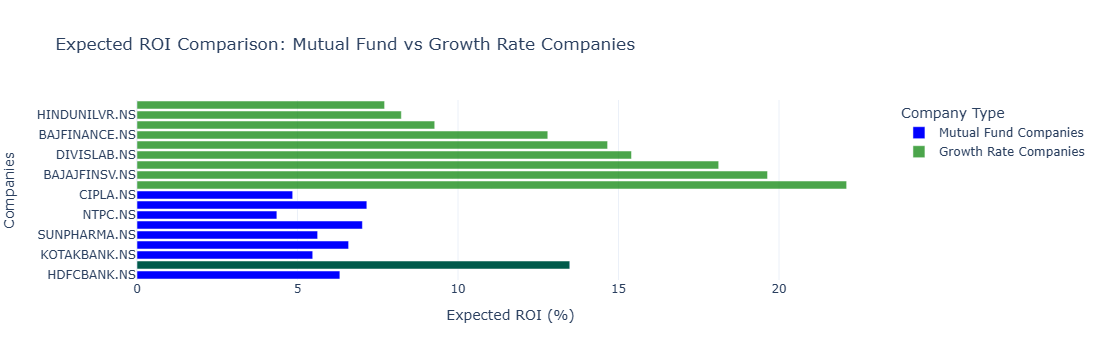

In [12]:
expected_roi_mutual_fund = roi_all_companies[selected_companies.index]

expected_roi_growth_companies = roi_all_companies[top_growth_companies.index]

fig = go.Figure()

fig.add_trace(go.Bar(
    y=expected_roi_mutual_fund.index,
    x=expected_roi_mutual_fund,
    orientation='h',  
    name='Mutual Fund Companies',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=expected_roi_growth_companies.index,
    x=expected_roi_growth_companies,
    orientation='h',  
    name='Growth Rate Companies',
    marker=dict(color='green'),
    opacity=0.7
))

fig.update_layout(
    title='Expected ROI Comparison: Mutual Fund vs Growth Rate Companies',
    xaxis_title='Expected ROI (%)',
    yaxis_title='Companies',
    barmode='overlay',  
    legend=dict(title='Company Type'),
    template='plotly_white'
)

fig.show()

The comparison between the risk (volatility) and expected ROI for mutual fund companies (in blue) and growth rate companies (in green) shows a clear trade-off. Mutual fund companies offer lower volatility, meaning they are less risky, but also provide lower expected returns. In contrast, growth rate companies demonstrate higher volatility, indicating more risk, but they offer much higher potential returns, especially companies like Bajaj Auto and Bajaj Finserv. This highlights a common investment dilemma: lower risk comes with a lower reward, while higher risk could yield higher returns.e.

For long-term investments, the goal is typically to find companies that offer a balance of stable returns and manageable risk. The companies in our mutual fund exhibit low volatility, meaning they are less risky, and their moderate returns make them solid choices for long-term, stable growth. They are well-suited for conservative investors who want steady returns without significant fluctuations in value.

### Calculating Expected Returns

Now, let’s calculate the expected returns a person will get from our mutual fund if he/she invests ₹5000 every month.

To calculate the expected value a person will accumulate over 1 year, 3 years, 5 years, and 10 years through the mutual fund plan, we can follow these steps:

1) Assume the person is investing 5000 rupees every month.
2) Use the expected ROI from the mutual fund companies to simulate the growth over time.
3) Compute the compounded value of the investments for each period (1y, 3y, 5y, and 10y).
4) Visualize the accumulated value over these periods.

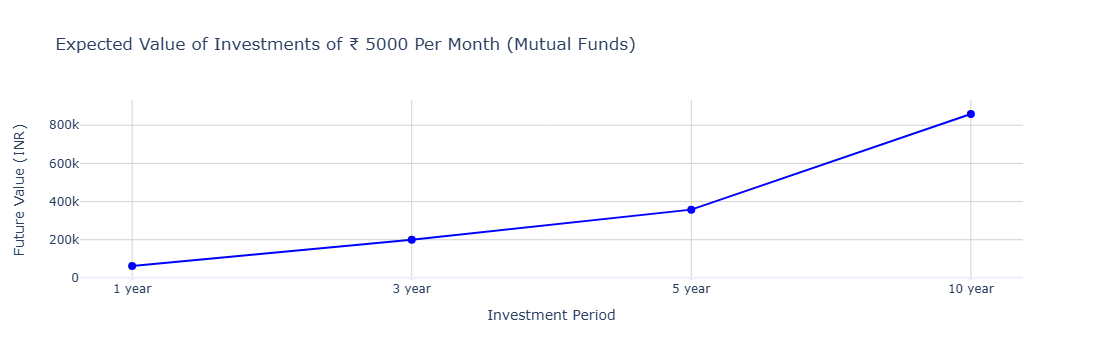

In [13]:
import numpy as np

monthly_investment = 5000  # Monthly investment in INR
years = [1, 3, 5, 10]  # Investment periods (in years)
n = 12  # Number of times interest is compounded per year (monthly)

avg_roi = expected_roi_mutual_fund.mean() / 100  # Convert to decimal

def future_value(P, r, n, t):
    return P * (((1 + r/n)**(n*t) - 1) / (r/n)) * (1 + r/n)

future_values = [future_value(monthly_investment, avg_roi, n, t) for t in years]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[str(year) + " year" for year in years],
    y=future_values,
    mode='lines+markers',
    line=dict(color='blue'),
    marker=dict(size=8),
    name='Future Value'
))

fig.update_layout(
    title="Expected Value of Investments of ₹ 5000 Per Month (Mutual Funds)",
    xaxis_title="Investment Period",
    yaxis_title="Future Value (INR)",
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template="plotly_white",
    hovermode='x'
)

fig.show()

After 1 year, the accumulated value is around ₹62,000, and by 5 years, it grows to over ₹300,000. The long-term benefit is evident, with the investment growing to nearly ₹860,000 over 10 years, which emphasises the value of consistent investing and compounding over time for long-term investors.